In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from PIL import Image

## Wordcloud

In [2]:
from wordcloud import WordCloud, STOPWORDS
from textwrap import wrap
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
%store -r dataframe_preprocessed

In [4]:
df = dataframe_preprocessed[['submission', 'preprocessing_full', 'preprocessing_sw_only']]
pd.options.display.max_colwidth = 1000

df

,submission,preprocessing_full,preprocessing_sw_only
0,"* * I have a 5775 in Math right now I have less than 2 weeks to bring up my math grade from an F to a D ( 3 points ) before I need to go to summer school and re-take it next year , and maybe not graduate I am a Sophomore in high-school Math has never been something I am good at I have 2 more tests , including one tomorrow My parents are yelling at me and stressing me out and making my self harming issue worse , and they wont get me a tutor Ive been having dizzy spells and fainting spells because im so stressed that I forget to take care of myself and life is shit WHAT do I do ? ? ? * *","* * i 5775 math right i 2 week bring math grade f d ( 3 point ) i need summer school re-tak year , mayb graduat i sophomor high-school math i good i 2 test , includ tomorrow my parent yell stress make self harm issu wors , tutor i have dizzi spell faint spell im stress i forget care life shit what i ? ? ? * *","* * I 5775 Math right I 2 weeks bring math grade F D ( 3 points ) I need summer school re-take year , maybe graduate I Sophomore high-school Math I good I 2 tests , including tomorrow My parents yelling stressing making self harming issue worse , tutor I having dizzy spells fainting spells im stressed I forget care life shit WHAT I ? ? ? * *"
1,"If nobody told you , let me remind you You are fucking awesomeI love you buddy , take care ! Dont stress , live your best !","if told , let remind you fuck awesomei love buddi , care ! stress , live best !","If told , let remind You fucking awesomeI love buddy , care ! stress , live best !"
2,I work third shifts Its killin me The dust in the factory is so bad its hard to breath every day nust gets worse its best paying job i ever had I need the money I need to be able to breath too tho i cant sleep eat or even fucntion right rn Im exausted 247 cuz i never get to sleep cuz i got ta do real life things during the day time When everyweres open So i dont get to sleep,i work shift it killin the dust factori bad hard breath day nust get wors best pay job i need money i need abl breath tho sleep eat fucntion right rn i exaust 247 cuz sleep cuz got real life thing day time when everywer open so sleep,I work shifts Its killin The dust factory bad hard breath day nust gets worse best paying job I need money I need able breath tho sleep eat fucntion right rn I exausted 247 cuz sleep cuz got real life things day time When everyweres open So sleep
3,"Im a high schooler right now , and am applying to college Im taking Multivariable calculus ( a college level math course ) right now , and the only way for me to end with an A in the class is if I get a 97-100 on the next two testsI cant keep my mind from worrying about this Every time I think about the class , I just want to throw up I liked math before this , but Im also taking an extremely rigorous course load , have so many extra things I do outside of school , and giving my 120 % to each activity is just draining me Sleeping is the best thing and only thing I want to do bc Im so mentally drainedI just dont know how to keep going I have 15 weeks left in this calculus class How do I continue the grind when Im this exhausted and study efficiently ? I have finals coming up , so I really need advice Thanks","i high schooler right , appli colleg i take multivari calculu ( colleg level math cours ) right , way end a class i 97-100 testsi mind worri everi time i think class , i just want throw i like math , i take extrem rigor cours load , extra thing i outsid school , give 120 % activ just drain sleep best thing thing i want bc i mental drainedi just know go i 15 week left calculu class how i continu grind i exhaust studi effici ? i final come , i realli need advic thank","I high schooler right , applying college I taking Multivariable calculus ( college level math course ) right , way end A class I 97-100 testsI mind worrying Every time I think class , I just want throw I liked math , I taking extremely rigo

In [5]:
cv = CountVectorizer(analyzer='word')
data_submission = cv.fit_transform(df['submission'])

# Document Term Matrix = dtm
df_dtm_submission = pd.DataFrame(data_submission.toarray(), columns=cv.get_feature_names())
df_dtm_submission


/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,100,120,15,247,5775,97,able,about,action,activity,...,with,wont,work,worrying,worse,would,year,yelling,you,your
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,1,1,0,0,1,0,2,0,1,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
9,0,0,0,0,0,0,0,4,0,0,...,2,0,0,0,0,0,0,0,0,0


In [6]:
cv = CountVectorizer(analyzer='word')
data_preprocessing_full = cv.fit_transform(df['preprocessing_full'])

# Document Term Matrix = dtm
df_dtm_full = pd.DataFrame(data_preprocessing_full.toarray(), columns=cv.get_feature_names())
df_dtm_full

/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,100,120,15,247,5775,97,abl,action,activ,advic,...,whirlpool,whoop,winter,wish,work,worri,wors,year,yell,you
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [7]:
cv = CountVectorizer(analyzer='word')
data_preprocessing_sw_only = cv.fit_transform(df['preprocessing_sw_only'])

# Document Term Matrix = dtm
df_dtm_sw_only = pd.DataFrame(data_preprocessing_sw_only.toarray(), columns=cv.get_feature_names())
df_dtm_sw_only

/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,100,120,15,247,5775,97,able,action,activity,advice,...,whirlpool,whoops,winter,wish,work,worrying,worse,year,yelling,you
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,1,1,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [8]:
print(df_dtm_submission.shape)
print(df_dtm_sw_only.shape)
print(df_dtm_full.shape)

(10, 379)
(10, 292)
(10, 272)


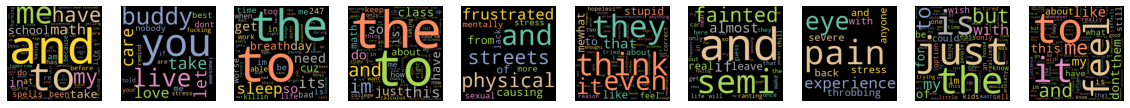

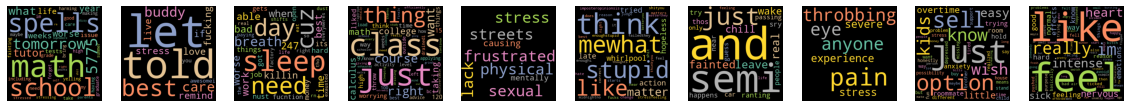

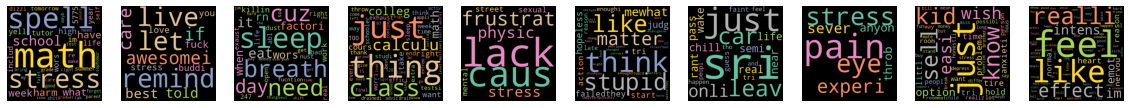

In [9]:
fig, ax = plt.subplots(1, 10, figsize=(20, 25))
fig2, ax2 = plt.subplots(1, 10, figsize=(20, 25))
fig3, ax3 = plt.subplots(1, 10, figsize=(20, 25))

def generate_wordcloud(data, term, ax_index, ax):
    wordcloud = WordCloud(width=300, height=300, max_words=300, background_color='black', colormap='Set2', 
                          collocations=False).generate_from_frequencies(data)
    plot_cloud(ax[ax_index], wordcloud)

def plot_cloud(ax, wordcloud):
    ax.imshow(wordcloud) 
    ax.axis("off");
    
df = df_dtm_submission.transpose()
df2 = df_dtm_sw_only.transpose()
df3 = df_dtm_full.transpose()

for index, term in enumerate(df.columns):
    generate_wordcloud(df[term].sort_values(ascending = True), term, index, ax)
for index, term in enumerate(df2.columns):
    generate_wordcloud(df2[term].sort_values(ascending = True), term, index, ax2)
for index, term in enumerate(df3.columns):
    generate_wordcloud(df3[term].sort_values(ascending = True), term, index, ax3)

In [10]:
## Combination submissions in the same mental health category

df = dataframe_preprocessed
all_content = ''
for index, row in df[['preprocessing_full']].iterrows():
    all_content = all_content + row[0]
    
all_content

'* * i 5775 math right i 2 week bring math grade f d ( 3 point ) i need summer school re-tak year , mayb graduat i sophomor high-school math i good i 2 test , includ tomorrow my parent yell stress make self harm issu wors , tutor i have dizzi spell faint spell im stress i forget care life shit what i ? ? ? * *if told , let remind you fuck awesomei love buddi , care ! stress , live best !i work shift it killin the dust factori bad hard breath day nust get wors best pay job i need money i need abl breath tho sleep eat fucntion right rn i exaust 247 cuz sleep cuz got real life thing day time when everywer open so sleepi high schooler right , appli colleg i take multivari calculu ( colleg level math cours ) right , way end a class i 97-100 testsi mind worri everi time i think class , i just want throw i like math , i take extrem rigor cours load , extra thing i outsid school , give 120 % activ just drain sleep best thing thing i want bc i mental drainedi just know go i 15 week left calculu

In [11]:
dataframe = pd.DataFrame([all_content], columns=["all_content"])

cv = CountVectorizer(analyzer='word')
all_submission = cv.fit_transform(dataframe['all_content'])

# Document Term Matrix = dtm
df_dtm_all_submission = pd.DataFrame(all_submission.toarray(), columns=cv.get_feature_names())
df_dtm_all_submission

/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,100,120,15,247,5775,97,abl,action,activ,advic,...,whirlpool,whoop,winter,wish,work,worri,wors,year,yell,you
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,2,1,1,2,1,1,1


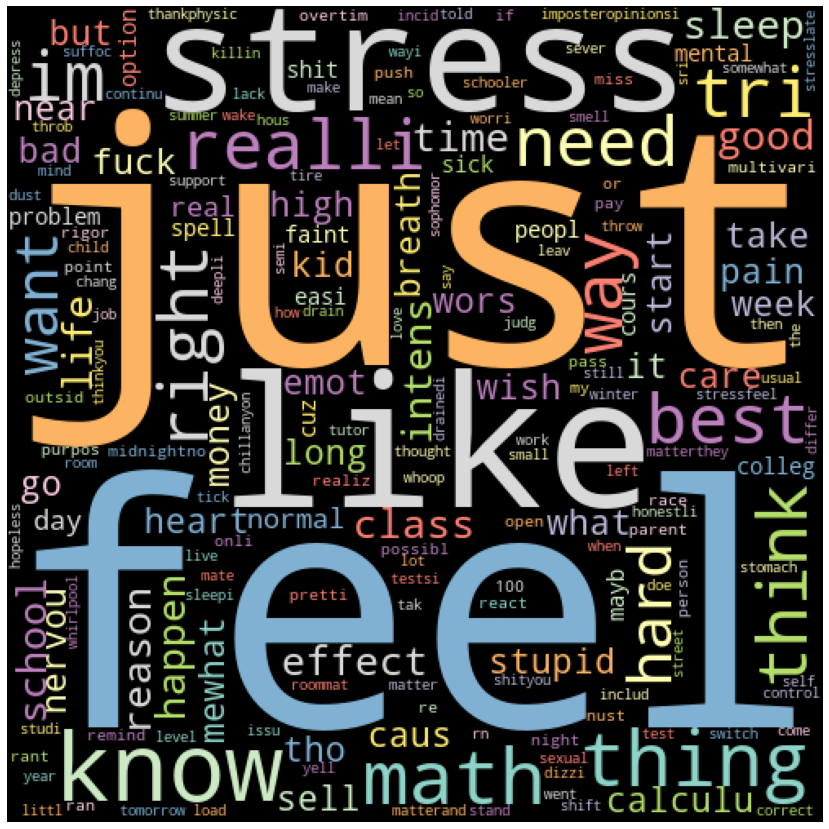

In [12]:
# mask = np.array(Image.open('comment.png'))

def generate_wordcloud(data, term):
    wordcloud = WordCloud(width=500, height=500, max_words=200, background_color='#000', colormap='Set3', 
                          collocations=False).generate_from_frequencies(data)
    plot_cloud(wordcloud)

def plot_cloud(wordcloud):
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud) 
    plt.axis("off");

df = df_dtm_all_submission.transpose()
for index, term in enumerate(df.columns):
    generate_wordcloud(df[term].sort_values(ascending = True), term)